In [1]:
from KIMETICS import *

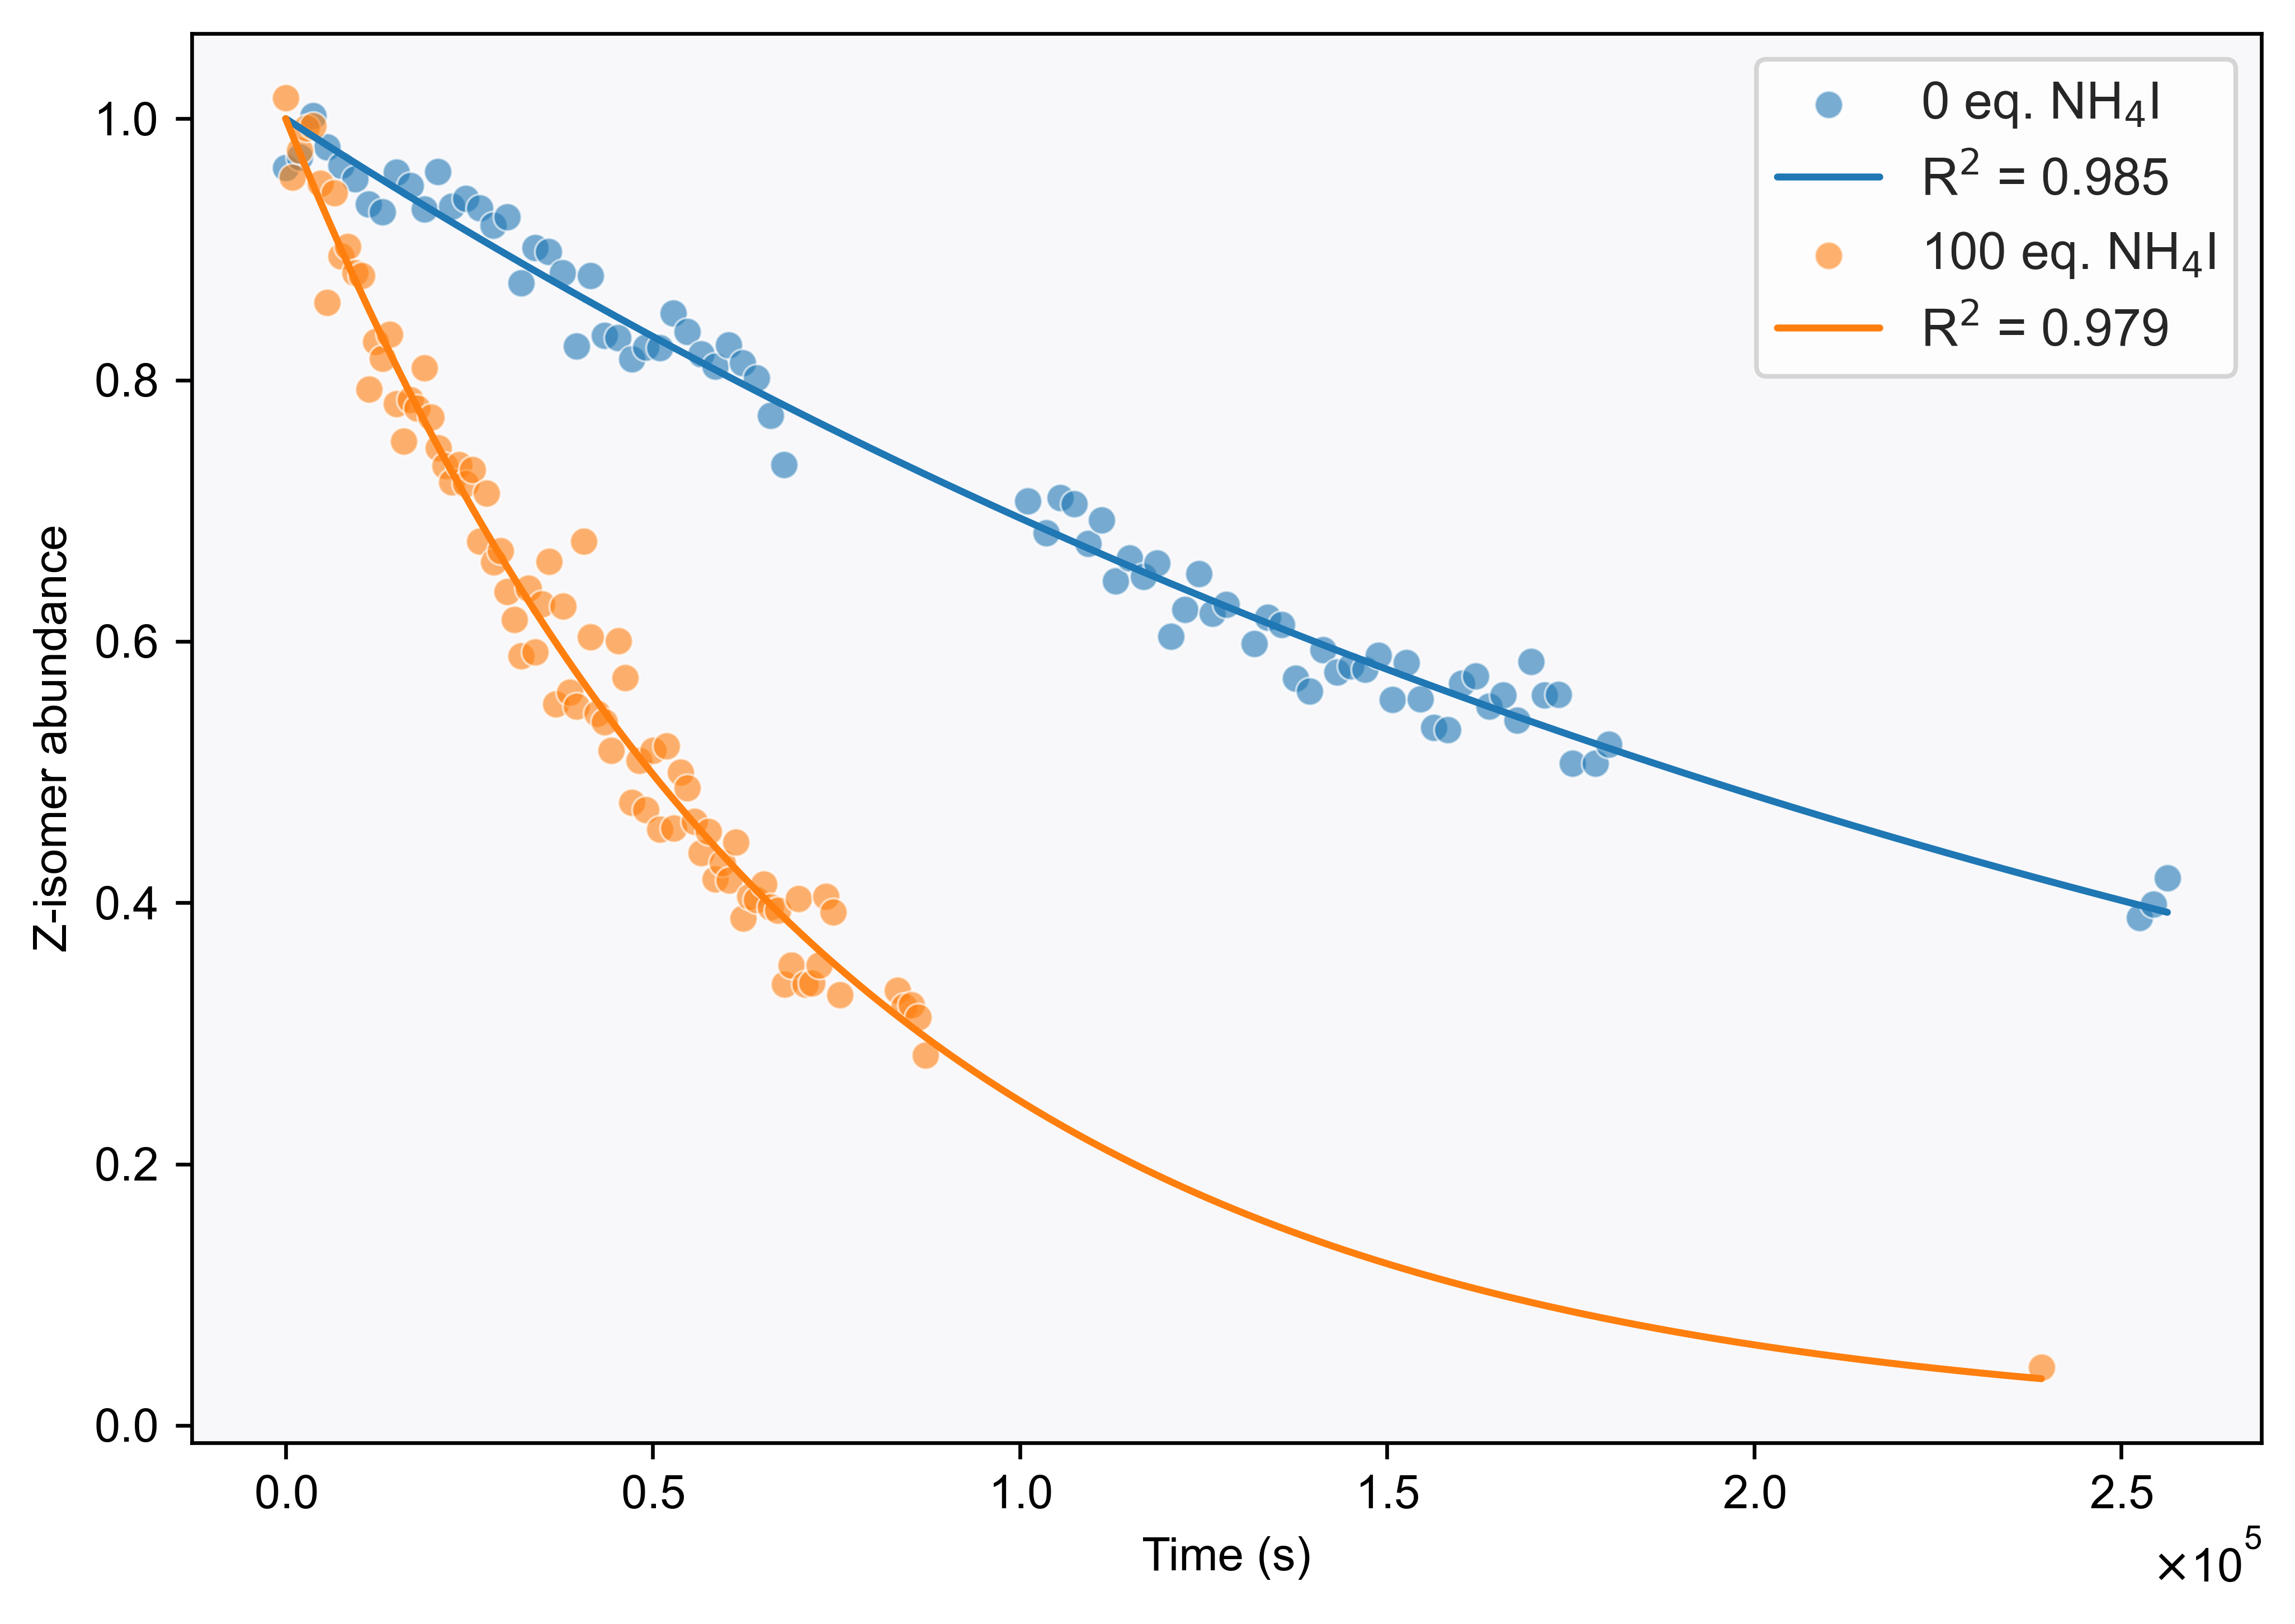

In [2]:
from matplotlib.ticker import MaxNLocator, AutoMinorLocator, ScalarFormatter, FuncFormatter, MultipleLocator
DIR=r"C:\Users\Thomas\Documents\#UMONS\FRIA\Data\Paper 1\Figure SI11"
solvents=["0 eq. NH${_4}$I", "100 eq. NH${_4}$I"]
files=["SYNAPT_THRO_240910_LCMS_NspeNazoNspe_NH4I_30deg_0_NH4I_kinetic.csv", 
       "SYNAPT_THRO_240910_LCMS_NspeNazoNspe_NH4I_30deg_100_NH4I_kinetic.csv"]
fig, ax=plt.subplots(figsize=[7, 5], dpi=600)
sns.set(style="whitegrid")

for i, file in enumerate(files):
    df=pd.read_csv(DIR/pathlib.Path(file))
    sns.scatterplot(data=df, x="Time", y="Z", label=solvents[i], alpha=0.6)
    x=df['Time'].to_numpy()
    y=df['Z'].to_numpy()
    popt, perr, rep, r2=fit_exponential_decay(x=x, y=y, y0=0)
    x_fit=np.linspace(np.min(x), np.max(x), 2000)
    y_fit=exponential_decay(x_fit, *popt)
    y_R2 = exponential_decay(x, *popt)
    r2=r2_score(y, y_R2)
    sns.lineplot(x=x_fit, y=y_fit, label=f'R$^{2}$ = {r2.round(3)}')
ax.set(xlabel="Time (s)", ylabel="Z-isomer abundance")
ax.set_facecolor('#F8F8FB')
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.tight_layout()
plt.grid(False)
plt.savefig(DIR/pathlib.Path('Kinetics_compilation_bis.png'), dpi=600)
plt.savefig(DIR/pathlib.Path('Kinetics_compilation_bis.svg'), dpi=600)
plt.show()